#**Next Word Prediciton**
#**Nama : Alya Fauziyah**
#**NIM : 21110030**
#**Kelas : S1-SD02A**

# Import Library Needed

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load Data

In [2]:
with open('/content/bieber.txt', 'r', encoding='unicode_escape') as myfile:
    mytext = myfile.read()

In [3]:
mytext

'What do you mean?\nOh, oh, oh\nWhen you sometimes say yes\nBut you sometimes say no\nWhat do you mean?\nHey, yeah\nWhen you don\'t want me to move\nBut you tell me to go\nWhat do you mean?\nOh\nWhat do you mean?\nSaid you\'re running out of time\nWhat do you mean?\nOh, oh, oh\nWhat do you mean?\nBetter make up your mind\nWhat do you mean? You\'re so indecisive, what I\'m saying\nTrying to catch the beat, make up your heart\nDon\'t know if you\'re happy or complaining\nDon\'t want for us to end\nWhere do I start?\nFirst you wanna go to the left and you want to turn right (ooh)\nWanna argue all day, hangin\' out all night (oh)\nFirst you\'re up, then you\'re down and in between\nOh, I really want to know What do you mean?\nOh, oh, oh\nWhen you sometimes say yes\nBut you sometimes say no\nWhat do you mean?\nHey, yeah\nWhen you don\'t want me to move\nBut you tell me to go\nWhat do you mean?\nOh, what do you mean?\nSaid you\'re running out of time\nWhat do you mean?\nOh, oh, oh\nWhat do y

# Preprocessing

In [4]:
my_tokenizer = Tokenizer()
my_tokenizer.fit_on_texts([mytext])
total_words = len(my_tokenizer.word_index) + 1

In [5]:
my_tokenizer.word_index

{'you': 1,
 'i': 2,
 'the': 3,
 'me': 4,
 'to': 5,
 'oh': 6,
 'and': 7,
 'my': 8,
 "i'm": 9,
 'it': 10,
 'that': 11,
 'be': 12,
 'love': 13,
 "don't": 14,
 'in': 15,
 'baby': 16,
 'your': 17,
 'yeah': 18,
 'a': 19,
 'no': 20,
 'one': 21,
 'all': 22,
 'we': 23,
 'girl': 24,
 'like': 25,
 'do': 26,
 'know': 27,
 'is': 28,
 'with': 29,
 'what': 30,
 'for': 31,
 'but': 32,
 "you're": 33,
 'so': 34,
 'up': 35,
 'on': 36,
 'make': 37,
 'got': 38,
 'need': 39,
 'if': 40,
 'right': 41,
 'never': 42,
 'now': 43,
 'just': 44,
 'when': 45,
 'can': 46,
 'want': 47,
 'go': 48,
 'let': 49,
 "'cause": 50,
 "it's": 51,
 'of': 52,
 'time': 53,
 'wanna': 54,
 'say': 55,
 "i'll": 56,
 'down': 57,
 'this': 58,
 'us': 59,
 'only': 60,
 'she': 61,
 'smile': 62,
 'heart': 63,
 "can't": 64,
 'see': 65,
 'get': 66,
 "ain't": 67,
 'tell': 68,
 'back': 69,
 'out': 70,
 'are': 71,
 'was': 72,
 'whoa': 73,
 'could': 74,
 'gonna': 75,
 'at': 76,
 'life': 77,
 'have': 78,
 'ooh': 79,
 "there's": 80,
 'nothing': 81,


#**Interpretasi Ouput :**

Dari output tersebut, dapat dilihat bahwa kata-kata dalam teks diubah menjadi angka-angka yang sesuai untuk diproses oleh komputer. Setiap kata memiliki nomor indeks yang unik. Misalnya, kata 'you' berindeks 1,
kata 'i'berindeks 2, kata 'the' berindeks 3, kata 'me' berindeks 4,kata 'to' berindeks 5, dan seterusnya.


In [6]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

[30, 26, 1, 90]
[6, 6, 6]
[45, 1, 164, 55, 354]
[32, 1, 164, 55, 20]
[30, 26, 1, 90]
[83, 18]
[45, 1, 14, 47, 4, 5, 267]
[32, 1, 68, 4, 5, 48]
[30, 26, 1, 90]
[6]
[30, 26, 1, 90]
[141, 33, 355, 70, 52, 53]
[30, 26, 1, 90]
[6, 6, 6]
[30, 26, 1, 90]
[106, 37, 35, 17, 94]
[30, 26, 1, 90, 33, 34, 719, 30, 9, 415]
[233, 5, 292, 3, 274, 37, 35, 17, 63]
[14, 27, 40, 33, 496, 145, 882]
[14, 47, 31, 59, 5, 385]
[95, 26, 2, 305]
[138, 1, 54, 48, 5, 3, 190, 7, 1, 47, 5, 331, 41, 79]
[54, 555, 22, 117, 612, 70, 22, 217, 6]
[138, 33, 35, 170, 33, 57, 7, 15, 186]
[6, 2, 179, 47, 5, 27, 30, 26, 1, 90]
[6, 6, 6]
[45, 1, 164, 55, 354]
[32, 1, 164, 55, 20]
[30, 26, 1, 90]
[83, 18]
[45, 1, 14, 47, 4, 5, 267]
[32, 1, 68, 4, 5, 48]
[30, 26, 1, 90]
[6, 30, 26, 1, 90]
[141, 33, 355, 70, 52, 53]
[30, 26, 1, 90]
[6, 6, 6]
[30, 26, 1, 90]
[106, 37, 35, 17, 94]
[30, 26, 1, 90, 33, 883, 45, 9, 884]
[233, 5, 885, 32, 2, 64, 720]
[1, 54, 37, 19, 497, 32, 1, 131, 886]
[1, 101, 4, 98, 3, 305, 152, 49, 58, 385]
[138, 

#**Interpretasi Ouput :**

Dari output tersebut, dapat dilihat bahwa urutan kata - kata (sequence) dimulai dari [30, 26, 1, 90] karena pada dataframe tersebut kata - kata yang muncul di awal adalah "What do you mean" yang mana kata "what" memiliki indeks 30, kata "do" memiliki indeks 26, kata "you" memiliki indeks 1, dan kata "mean" memiliki indeks 90.

In [7]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

Output streaming akan dipotong hingga 5000 baris terakhir.
[283, 1, 46, 174, 4, 15, 8, 124, 7, 65]
[283, 1, 46, 174, 4, 15, 8, 124, 7, 65, 2]
[283, 1, 46, 174, 4, 15, 8, 124, 7, 65, 2, 67]
[283, 1, 46, 174, 4, 15, 8, 124, 7, 65, 2, 67, 364]
[129, 40]
[129, 40, 1847]
[129, 40, 1847, 30]
[129, 40, 1847, 30, 2]
[129, 40, 1847, 30, 2, 1159]
[129, 40, 1847, 30, 2, 1159, 170]
[129, 40, 1847, 30, 2, 1159, 170, 2]
[129, 40, 1847, 30, 2, 1159, 170, 2, 486]
[129, 40, 1847, 30, 2, 1159, 170, 2, 486, 364]
[32, 132]
[32, 132, 49]
[32, 132, 49, 237]
[32, 132, 49, 237, 360]
[32, 132, 49, 237, 360, 15]
[32, 132, 49, 237, 360, 15, 7]
[32, 132, 49, 237, 360, 15, 7, 68]
[32, 132, 49, 237, 360, 15, 7, 68, 237]
[32, 132, 49, 237, 360, 15, 7, 68, 237, 22]
[166, 1848]
[166, 1848, 1849]
[166, 1848, 1849, 1850]
[166, 1848, 1849, 1850, 36]
[166, 1848, 1849, 1850, 36, 3]
[166, 1848, 1849, 1850, 36, 3, 656]
[166, 1848, 1849, 1850, 36, 3, 656, 95]
[166, 1848, 1849, 1850, 36, 3, 656, 95, 23]
[166, 1848, 1849, 1850,

In [8]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
input_sequences

array([[  0,   0,   0, ...,   0,  30,  26],
       [  0,   0,   0, ...,  30,  26,   1],
       [  0,   0,   0, ...,  26,   1,  90],
       ...,
       [  0,   0,   0, ...,   5, 308,   4],
       [  0,   0,   0, ..., 308,   4, 371],
       [  0,   0,   0, ...,   0,   6,   6]], dtype=int32)

In [10]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [11]:
X[2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30, 26,  1],
      dtype=int32)

In [12]:
y[2]

90

In [13]:
X

array([[  0,   0,   0, ...,   0,   0,  30],
       [  0,   0,   0, ...,   0,  30,  26],
       [  0,   0,   0, ...,  30,  26,   1],
       ...,
       [  0,   0,   0, ...,   1,   5, 308],
       [  0,   0,   0, ...,   5, 308,   4],
       [  0,   0,   0, ...,   0,   0,   6]], dtype=int32)

In [14]:
y

array([ 26,   1,  90, ...,   4, 371,   6], dtype=int32)

In [15]:
# lakukan one hot encoding
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [16]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Define Models

In [18]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 100)           197900    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1979)              298829    
                                                                 
Total params: 647329 (2.47 MB)
Trainable params: 647329 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
hist = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
807/807 [==============================] - 18s 18ms/step - loss: 5.7885 - accuracy: 0.0573
Epoch 2/100
807/807 [==============================] - 7s 9ms/step - loss: 5.0530 - accuracy: 0.1110
Epoch 3/100
807/807 [==============================] - 5s 7ms/step - loss: 4.3356 - accuracy: 0.1947
Epoch 4/100
807/807 [==============================] - 6s 7ms/step - loss: 3.7863 - accuracy: 0.2695
Epoch 5/100
807/807 [==============================] - 5s 6ms/step - loss: 3.3533 - accuracy: 0.3316
Epoch 6/100
807/807 [==============================] - 6s 7ms/step - loss: 2.9897 - accuracy: 0.3853
Epoch 7/100
807/807 [==============================] - 5s 6ms/step - loss: 2.6810 - accuracy: 0.4393
Epoch 8/100
807/807 [==============================] - 5s 6ms/step - loss: 2.4098 - accuracy: 0.4924
Epoch 9/100
807/807 [==============================] - 6s 7ms/step - loss: 2.1758 - accuracy: 0.5337
Epoch 10/100
807/807 [==============================] - 5s 6ms/step - loss: 1.9731 - accu

**Interpretasi Ouput :**

Dari output tersebut, dapat dilihat bahwa nilai loss: 0.4319 artinya model memiliki tingkat kehilangan yang relatif rendah. Dengan kata lain, model yang dibuat telah melakukan prediksi yang lebih baik atau lebih dekat dengan nilai target pada data training. Sementara nilai accuracy: 0.8589. Artinya, model yang dibuat memiliki tingkat keakuratan sekitar 85.51% dalam memprediksi target pada data training. Dengan kata lain, sekitar 85.51% dari prediksi yang dilakukan oleh model adalah benar berdasarkan data training.

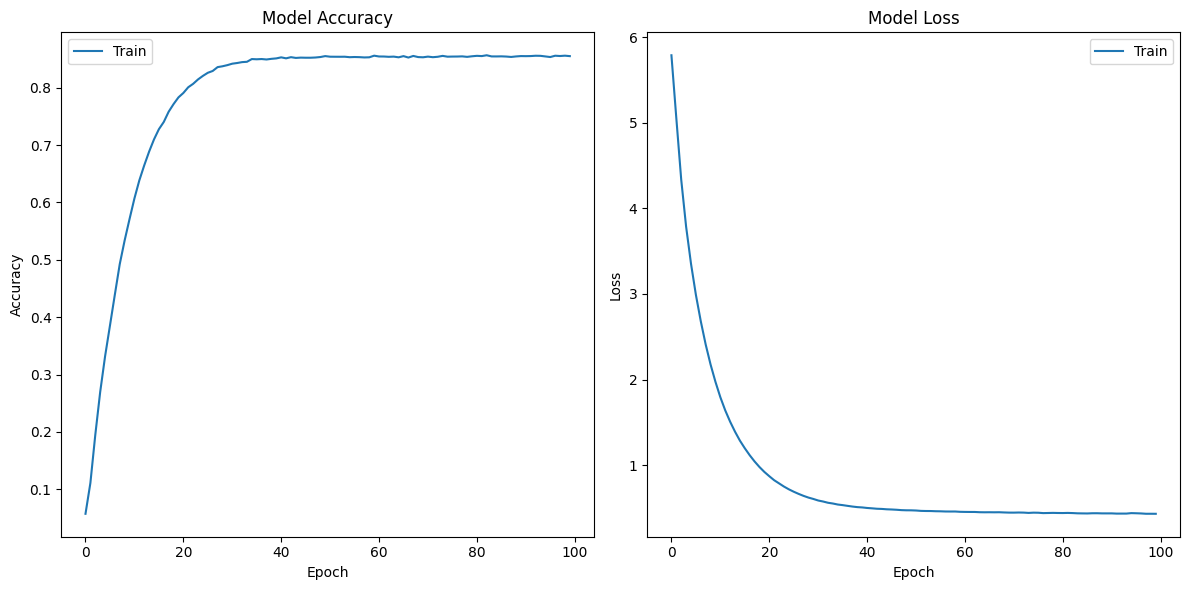

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Interpretasi Ouput :**

Dari output tersebut, dapat dilihat bahwa akurasi model memiliki tingkat keakuratan sekitar 85.51% dalam memprediksi target pada data training. Dengan kata lain, sekitar 85.51% dari prediksi yang dilakukan oleh model adalah benar berdasarkan data training. Sementara untuk model loss memiliki nilai sebesar 0.4319 atau 43.19% artinya model memiliki tingkat kehilangan yang relatif rendah. Dengan kata lain, model yang dibuat telah melakukan prediksi yang lebih baik atau lebih dekat dengan nilai target pada data training.

In [22]:
model.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Make Prediction

In [23]:
model_loaded = load_model("mymodel.h5")

In [28]:
import numpy as np

input_text = "baby"
predict_next_words = 15

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model_loaded.predict(token_list)[0]

    # Get indices of top predicted words
    top_indices = np.argsort(predictions)[-5:][::-1]  # Adjust 5 to the number of top words you want

    # Get words corresponding to the indices
    next_words = [word for word, index in my_tokenizer.word_index.items() if index in top_indices]

    # Print the list of next words along with their probabilities
    print("Input Text:", input_text)
    print("Next Words and Probabilities:")
    for word, index in zip(next_words, top_indices):
        probability = predictions[index]
        print(f"{word}: {probability:.4f}")

    # Choose the word with the highest probability as the next word
    output_word = my_tokenizer.index_word[top_indices[0]]

    input_text += " " + output_word

print(input_text)

1/1 [==============================] - 0s 20ms/step
Input Text: baby
Next Words and Probabilities:
don't: 0.1934
no: 0.1334
we: 0.1174
do: 0.1107
think: 0.1041
1/1 [==============================] - 0s 16ms/step
Input Text: baby don't
Next Words and Probabilities:
you: 0.8264
want: 0.1713
have: 0.0011
stress: 0.0004
shy: 0.0002
1/1 [==============================] - 0s 18ms/step
Input Text: baby don't stress
Next Words and Probabilities:
my: 0.9934
no: 0.0015
for: 0.0008
nothing: 0.0008
over: 0.0008
1/1 [==============================] - 0s 19ms/step
Input Text: baby don't stress over
Next Words and Probabilities:
you: 0.9975
the: 0.0009
me: 0.0002
you're: 0.0002
smile: 0.0002
1/1 [==============================] - 0s 21ms/step
Input Text: baby don't stress over me
Next Words and Probabilities:
love: 0.6863
we: 0.3006
get: 0.0039
believe: 0.0020
come: 0.0017
1/1 [==============================] - 0s 19ms/step
Input Text: baby don't stress over me come
Next Words and Probabilities:
to: 

**Interpretasi Ouput :**

Dari output di atas, terlihat bahwa model telah menghasilkan prediksi untuk kata-kata selanjutnya berdasarkan teks input awal "baby". Iterasi dilakukan sebanyak 15 kali, dan pada setiap iterasi, model memprediksi beberapa kata yang memiliki probabilitas tertinggi.

In [30]:
input_text = "Keep you on"
predict_next_words = 7

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[131, 1, 36]
1/1 [==============================] - 0s 59ms/step
[131, 1, 36, 8]
1/1 [==============================] - 0s 39ms/step
[131, 1, 36, 8, 527]
1/1 [==============================] - 0s 47ms/step
[131, 1, 36, 8, 527, 24]
1/1 [==============================] - 0s 54ms/step
[131, 1, 36, 8, 527, 24, 176]
1/1 [==============================] - 0s 53ms/step
[131, 1, 36, 8, 527, 24, 176, 42]
1/1 [==============================] - 0s 17ms/step
[131, 1, 36, 8, 527, 24, 176, 42, 12]
1/1 [==============================] - 0s 17ms/step
Keep you on my arm girl you'd never be alone


## Save Model

In [31]:
model.save("mymodel.h5")

## Load Model

In [33]:
model_loaded = load_model("mymodel.h5")

In [35]:
input_text = "Imma"
predict_next_words = 11

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[976]
1/1 [==============================] - 0s 28ms/step
[976, 37]
1/1 [==============================] - 0s 30ms/step
[976, 37, 1]
1/1 [==============================] - 0s 57ms/step
[976, 37, 1, 528]
1/1 [==============================] - 0s 18ms/step
[976, 37, 1, 528, 977]
1/1 [==============================] - 0s 17ms/step
[976, 37, 1, 528, 977, 25]
1/1 [==============================] - 0s 23ms/step
[976, 37, 1, 528, 977, 25, 33]
1/1 [==============================] - 0s 23ms/step
[976, 37, 1, 528, 977, 25, 33, 978]
1/1 [==============================] - 0s 20ms/step
[976, 37, 1, 528, 977, 25, 33, 978, 15]
1/1 [==============================] - 0s 20ms/step
[976, 37, 1, 528, 977, 25, 33, 978, 15, 3]
1/1 [==============================] - 0s 18ms/step
[976, 37, 1, 528, 977, 25, 33, 978, 15, 3, 437]
1/1 [==============================] - 0s 17ms/step
Imma make you shine bright like you're laying in the snow burr


## KESIMPULAN

Model telah menghasilkan teks prediksi yang memiliki kelanjutan dan makna. Meskipun tidak selalu membentuk kalimat yang sempurna, hasilnya cukup mengikuti pola kata-kata yang masuk akal berdasarkan konteks input awal.